In [129]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
from cmcrameri import cm

import os
from pathlib import Path
import shutil
import gzip
import re
import csv

import timeit

In [130]:
# data_path = 'data/simulation_data'
# output_file = 'processed_data/WDBH_data.csv'
# header = "#N,#rv,#rg,#z,#t_snapshot[myr],#M1[MSUN],#M2[MSUN],#k1,#k2,#id1,#id2,#sma[AU],#ecc,#bin_star_radius0[RSUN],#bin_star_radius1[RSUN],#snapshot, #roche_lobe1_calc[RSUN], #roche_lobe2_calc[RSUN],#radrol0,#radrol1"


In [131]:
data_path = 'data/updated_simulation_data'
output_file_all = 'processed_data/collisions_GiantBH_data.csv'
output_file_nocollision = 'processed_data/nocollision_GiantBH_data.csv'
#header = "#N,#rv,#rg,#z,#t_snapshot[myr],#M1[MSUN],#M2[MSUN],#k1,#k2,#id1,#id2,#sma[AU],#ecc,#bin_star_radius0[RSUN],#bin_star_radius1[RSUN],#snapshot, #roche_lobe1_calc[RSUN], #roche_lobe2_calc[RSUN],#radrol0,#radrol1"


In [132]:
def parse_log(log_file):

    with open(log_file, 'r') as f:
        lines = f.readlines()

    parsed_data = []

    for line in lines:
        # Regular expression to extract values
        pattern = r"t=([\d.]+)\s+([\w-]+)\s+idm=(\d+)\(mm=([\d.]+)\)\s+(?:id1=(\d+)\(m1=([\d.]+)\))?(?::id2=(\d+)\(m2=([\d.]+)\))?(?::id3=(\d+)\(m3=([\d.]+)\))?(?::id4=(\d+)\(m4=([\d.]+)\))? \(r=([\d.]+)\)\s+typem=(\d+)\s+type1=(\d+)\s+type2=(\d+)(?:\s+type3=(\d+))?(?:\s+type4=(\d+))?(?:\s+b\[RSUN\]=([\d.]+))?(?:\s+vinf\[km/s\]=([\d.]+))?"

        match = re.match(pattern, line)
        if match:
            row = list(match.groups())
            # Insert mass_merger after id_merger
            row.insert(3, row.pop(3))
            # Replace missing values with '-100'
            for i in range(len(row)):
                if row[i] is None:
                    row[i] = '-100'

            parsed_data.append(row)
    
    return np.array(parsed_data)

In [133]:
all_coll = []
id_Giant = [2, 3, 4, 5, 6, 7, 8, 9]
id_BH = [14]

### Grab all values
# Loop over all model folders
for folder in os.listdir(data_path):
    folder_path = os.path.join(data_path, folder);
    # Checks is a folder
    if os.path.isdir(folder_path):
        # Loops through all the snapshots
        for subfolder in os.listdir(folder_path):
            subfolder_path = os.path.join(folder_path, subfolder);
            
            ### Find the timeunitsmyr conversion value
            if os.path.isdir(subfolder_path):
                for infosubfolder in os.listdir(subfolder_path):
                    if infosubfolder.endswith('.sh'):
                        infosubfolder_path = os.path.join(subfolder_path, infosubfolder);
                        # Read the file
                        with open(infosubfolder_path, 'r') as file:
                            lines = file.readlines();

                        # Extract the value for timeunitsmyr
                        for line in lines:
                            if line.startswith('timeunitsmyr'):
                                _, value = line.split('=');
                                timeunitsmyr = float(value.strip());
                                print(timeunitsmyr);
                                break
                
                for infosubfolder in os.listdir(subfolder_path):
                    ### Obtain desired data from info files
                    if infosubfolder.endswith('.collision.log'):
                        infosubfolder_path = os.path.join(subfolder_path, infosubfolder);
                        ### Grab the values of the parameters from the file path
                        # Define the regular expression pattern
                        pattern = r"N(?P<N>[\d.]+)_rv(?P<rv>[\d.]+)_rg(?P<rg>[\d.]+)_z(?P<z>[\d.]+)";
                        # Search for the pattern in the file path
                        match = re.search(pattern, subfolder_path);
                        # If a match is found, extract the values and convert them to floats
                        if match:
                            mod_params = [float(match.group('N')), float(match.group('rv')), float(match.group('rg')), float(match.group('z'))];
                        else:
                            print("Pattern not found in the file path.");
                        
                        # Parse the log file
                        events_all = parse_log(infosubfolder_path)
                        
                        events_all_list = events_all.tolist()

                        # Time unit conversion
                        for sublist in events_all_list:
                            sublist[0] = float(sublist[0]) * timeunitsmyr
                        
                        # Append the model parameters to the start of each sublist
                        data_list = [mod_params + sublist if type(sublist) is list else mod_params + [sublist] for sublist in events_all_list];
                            
                        # Append the data to the list of all data
                        if len(data_list) > 0:
                            all_coll += data_list;

884.472
884.472
884.472
884.472
884.472
884.472
2501.66
2501.66
2501.66
2501.66
2501.66
2501.66
2501.66
2501.66
2501.66
7075.78
7075.78
7075.78
7075.78
7075.78
7075.78
7075.78
7075.78
7075.78
20013.3
20013.3
20013.3
20013.3
20013.3
20013.3
20013.3
20013.3
20013.3
400.802
400.802
400.802
400.802
400.802
400.802
400.802
400.802
400.802
1133.64
1133.64
1133.64
1133.64
1133.64
1133.64
1133.64
1133.64
1133.64
3206.41
3206.41
3206.41
3206.41
3206.41
3206.41
3206.41
3206.41
3206.41
9069.11
9069.11
9069.11
9069.11
9069.11
9069.11
9069.11
9069.11
9069.11
3306.65
3306.65
9352.61
9352.61
516.414
516.414
516.414
516.414
516.414
516.414
516.414
516.414
395.298
1460.64
1460.64
1460.64
1460.64
1460.64
1460.64
1460.64
1460.64
1460.64
4131.31
4131.31
4131.31
4131.31
4131.31
4131.31
4131.31
4131.31
4131.31
11685.1
11685.1
11685.1
11685.1
11685.1
11685.1
11685.1
11685.1
11685.1
673.893
673.893
673.893
673.893
673.893
673.893
673.893
673.893
673.893
1906.06
1906.06
1906.06
1906.06
1906.06
1906.06
1906.06


In [134]:
id_merger = np.array(all_coll)[::,6].astype(float)

# Load the CSV file into a numpy array
data = np.loadtxt(output_file_all, delimiter=',', dtype=str, skiprows=1)

id_Giants = data[:, 10].astype(float)

# Check not merger product
check_notmerger = np.invert(np.isin(id_Giants, id_merger))

events_GiantBH = np.array(data)[check_notmerger]

In [135]:
print(len(data))
print(len(events_GiantBH))

6715
5099


In [136]:
headers = ['N','rv','rg','z','time', 'interaction_type', 'id_merger', 'mass_merger', 'id1', 'm1', 'id2', 'm2', 'id3', 'm3', 'id4', 'm4', 
            'r', 'typem', 'type1', 'type2', 'type3', 'type4', 'b[RSUN]', 'vinf[km/s]']

with open(output_file_nocollision, 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(headers)
    writer.writerows(events_GiantBH)

In [137]:
# Load the CSV file into a numpy array
data = np.loadtxt(output_file_nocollision, delimiter=',', dtype=str, skiprows=1)

C:\Users\willi\AppData\Local\Temp\ipykernel_61748\2537567313.py:38: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  legend_handles.append(ax.scatter([], [], c=color, label=label))


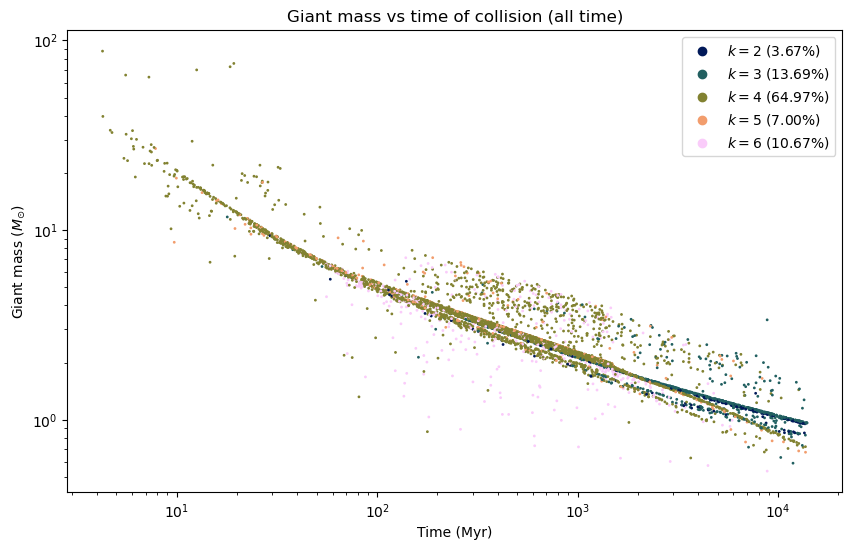

In [138]:
mass_BH = data[::, 9].astype(float)

mass_Giant = data[::, 11].astype(float)
type_Giant = data[::, 19].astype(float)
times_GiantBH = data[::, 4].astype(float)


colors = cm.batlow(np.linspace(0, 1, len(set(type_Giant))))


# Get unique numbers from the list
unique_numbers = list(set(type_Giant))
unique_numbers.sort()

# Create a mapping of unique numbers to colors
N_to_color = {num: colors[i % len(colors)] for i, num in enumerate(unique_numbers)}
colors_N = [N_to_color[N] for N in type_Giant]

# Get percentages for each type
fractions = [100 * list(type_Giant).count(N) / len(type_Giant) for N in unique_numbers]

fig, ax = plt.subplots(figsize=(10, 6))

scatter = ax.scatter(times_GiantBH, mass_Giant, s=1, color=colors_N)
ax.set_xlabel(r'Time (Myr)')
ax.set_ylabel(r'Giant mass ($M_{\odot}$)')
ax.set_title('Giant mass vs time of collision (all time)')
ax.set_xscale('log')
ax.set_yscale('log')


# Create a legend
legend_labels = {N: rf'$k={int(N)}$ ({frac:.2f}%)' for N,frac in zip(unique_numbers, fractions)}
legend_handles = []
for N in unique_numbers:
    label = legend_labels[N]
    color = N_to_color[N]
    legend_handles.append(ax.scatter([], [], c=color, label=label))
ax.legend(handles=legend_handles, loc='best')

C:\Users\willi\AppData\Local\Temp\ipykernel_61748\1131717218.py:41: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  legend_handles.append(ax.scatter([], [], c=color, label=label))


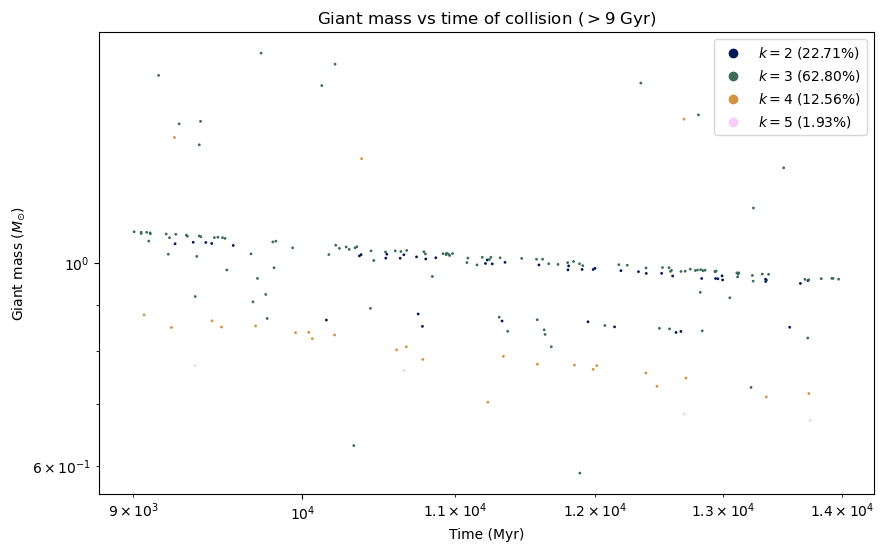

In [139]:

# Check age
check_old = np.array(data[:, 4], dtype=float) > 9e3
data_old = data[check_old]

mass_BH = data_old[::, 9].astype(float)
mass_Giant = data_old[::, 11].astype(float)
type_Giant = data_old[::, 19].astype(float)
times_GiantBH = data_old[::, 4].astype(float)


colors = cm.batlow(np.linspace(0, 1, len(set(type_Giant))))


# Get unique numbers from the list
unique_numbers = list(set(type_Giant))
unique_numbers.sort()

# Create a mapping of unique numbers to colors
N_to_color = {num: colors[i % len(colors)] for i, num in enumerate(unique_numbers)}
colors_N = [N_to_color[N] for N in type_Giant]

# Get percentages for each type
fractions_old = [100 * list(type_Giant).count(N) / len(type_Giant) for N in unique_numbers]

fig, ax = plt.subplots(figsize=(10, 6))

scatter = ax.scatter(times_GiantBH, mass_Giant, s=1, color=colors_N)
ax.set_xlabel(r'Time (Myr)')
ax.set_ylabel(r'Giant mass ($M_{\odot}$)')
ax.set_title('Giant mass vs time of collision ($> 9$ Gyr)')
ax.set_xscale('log')
ax.set_yscale('log')


# Create a legend
legend_labels = {N: rf'$k={int(N)}$ ({frac:.2f}%)' for N,frac in zip(unique_numbers, fractions_old)}
legend_handles = []
for N in unique_numbers:
    label = legend_labels[N]
    color = N_to_color[N]
    legend_handles.append(ax.scatter([], [], c=color, label=label))
ax.legend(handles=legend_handles, loc='best')

C:\Users\willi\AppData\Local\Temp\ipykernel_61748\3022633217.py:45: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  legend_handles.append(ax.scatter([], [], c=color, label=label))


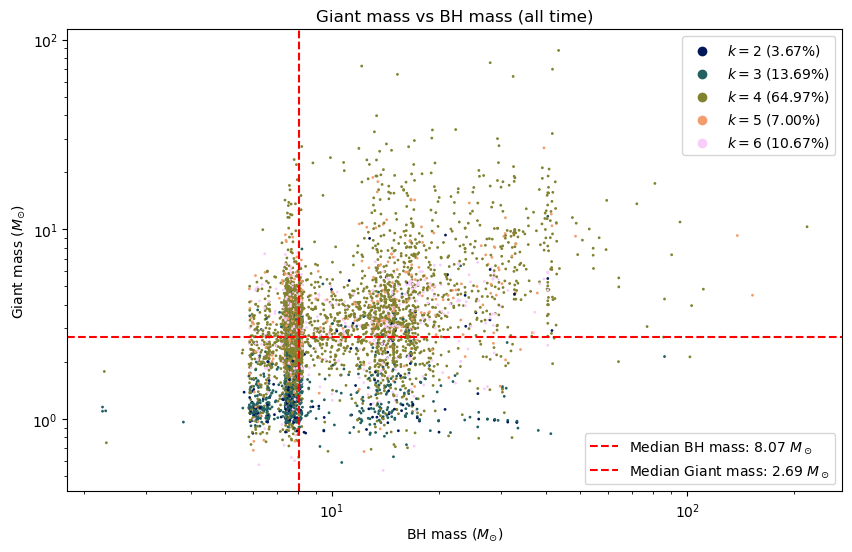

In [140]:
mass_BH = data[::, 9].astype(float)

mass_Giant = data[::, 11].astype(float)
type_Giant = data[::, 19].astype(float)
times_GiantBH = data[::, 4].astype(float)


colors = cm.batlow(np.linspace(0, 1, len(set(type_Giant))))


# Get unique numbers from the list
unique_numbers = list(set(type_Giant))
unique_numbers.sort()

# Create a mapping of unique numbers to colors
N_to_color = {num: colors[i % len(colors)] for i, num in enumerate(unique_numbers)}
colors_N = [N_to_color[N] for N in type_Giant]

# Get percentages for each type
fractions = [100 * list(type_Giant).count(N) / len(type_Giant) for N in unique_numbers]

fig, ax = plt.subplots(figsize=(10, 6))

scatter = ax.scatter(mass_BH, mass_Giant, s=1, color=colors_N)

median_BH = np.median(mass_BH)
median_Giant = np.median(mass_Giant)
median_BH_line = ax.axvline(median_BH, color='red', linestyle='--', label=rf'Median BH mass: {median_BH:.2f} $M_\odot$')
median_Giant_line = ax.axhline(median_Giant, color='red', linestyle='--', label=rf'Median Giant mass: {median_Giant:.2f} $M_\odot$')


ax.set_xlabel(r'BH mass ($M_{\odot}$)')
ax.set_ylabel(r'Giant mass ($M_{\odot}$)')
ax.set_title('Giant mass vs BH mass (all time)')
ax.set_xscale('log')
ax.set_yscale('log')


# Create the first legend
legend_labels = {N: rf'$k={int(N)}$ ({frac:.2f}%)' for N, frac in zip(unique_numbers, fractions)}
legend_handles = []
for N in unique_numbers:
    label = legend_labels[N]
    color = N_to_color[N]
    legend_handles.append(ax.scatter([], [], c=color, label=label))
first_legend = ax.legend(handles=legend_handles, loc='best')
ax.add_artist(first_legend)  # Add the first legend as an artist to the axes

# Create the second legend for the median lines
median_legend = ax.legend(handles=[median_BH_line, median_Giant_line], loc='lower right')


C:\Users\willi\AppData\Local\Temp\ipykernel_61748\2817646052.py:47: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  legend_handles.append(ax.scatter([], [], c=color, label=label))


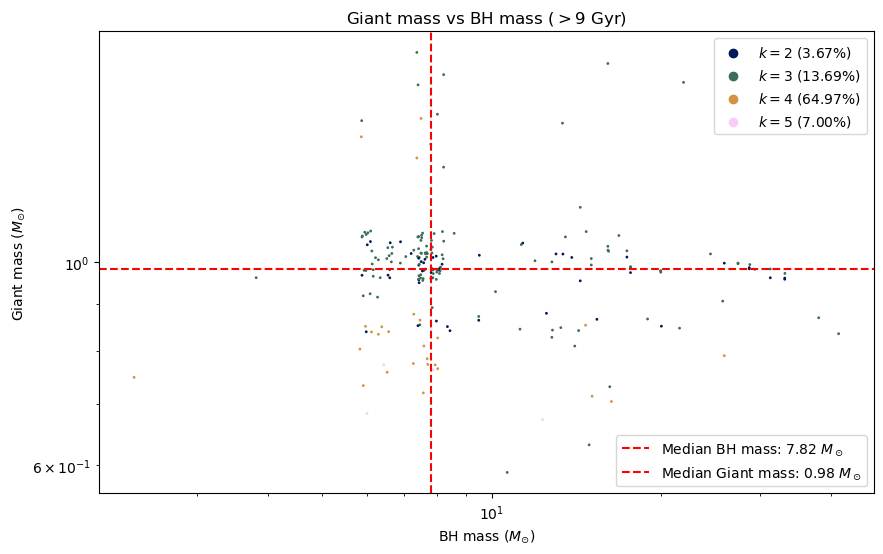

In [141]:

# Check age
check_old = np.array(data[:, 4], dtype=float) > 9e3
data_old = data[check_old]

mass_BH = data_old[::, 9].astype(float)
mass_Giant = data_old[::, 11].astype(float)
type_Giant = data_old[::, 19].astype(float)
times_GiantBH = data_old[::, 4].astype(float)


colors = cm.batlow(np.linspace(0, 1, len(set(type_Giant))))


# Get unique numbers from the list
unique_numbers_old = list(set(type_Giant))
unique_numbers_old.sort()

# Create a mapping of unique numbers to colors
N_to_color = {num: colors[i % len(colors)] for i, num in enumerate(unique_numbers_old)}
colors_N = [N_to_color[N] for N in type_Giant]

# Get percentages for each type
fractions_old = [100 * list(type_Giant).count(N) / len(type_Giant) for N in unique_numbers_old]

fig, ax = plt.subplots(figsize=(10, 6))

scatter = ax.scatter(mass_BH, mass_Giant, s=1, color=colors_N)

median_BH = np.median(mass_BH)
median_Giant = np.median(mass_Giant)
median_BH_line = ax.axvline(median_BH, color='red', linestyle='--', label=f'Median BH mass: {median_BH:.2f} $M_\odot$')
median_Giant_line = ax.axhline(median_Giant, color='red', linestyle='--', label=f'Median Giant mass: {median_Giant:.2f} $M_\odot$')

ax.set_xlabel(r'BH mass ($M_{\odot}$)')
ax.set_ylabel(r'Giant mass ($M_{\odot}$)')
ax.set_title(r'Giant mass vs BH mass ($> 9$ Gyr)')
ax.set_xscale('log')
ax.set_yscale('log')


# Create the first legend
legend_labels = {N: rf'$k={int(N)}$ ({frac:.2f}%)' for N, frac in zip(unique_numbers, fractions_old)}
legend_handles = []
for N in unique_numbers_old:
    label = legend_labels[N]
    color = N_to_color[N]
    legend_handles.append(ax.scatter([], [], c=color, label=label))
first_legend = ax.legend(handles=legend_handles, loc='best')
ax.add_artist(first_legend)  # Add the first legend as an artist to the axes

# Create the second legend for the median lines
median_legend = ax.legend(handles=[median_BH_line, median_Giant_line], loc='lower right')


In [142]:

# Define the dictionary for the mapping
stage_mapping = {
    0: "Main Sequence (MS), $< 0.7 M_\odot$",
    1: "MS, $> 0.7 M_\odot$",
    2: "Hertzsprung Gap",
    3: "First Giant Branch",
    4: "Core Helium Burning",
    5: "Early Asymptotic Giant Branch (AGB)",
    6: "Thermally Pulsing AGB",
    7: "Naked Helium Star MS",
    8: "Naked Helium Star Hertzsprung Gap",
    9: "Naked Helium Star Giant Branch",
    10: "Helium White Dwarf",
    11: "Carbon/Oxygen White Dwarf",
    12: "Oxygen/Neon White Dwarf",
    13: "Neutron Star",
    14: "Black Hole",
    15: "Massless Remnant"
}


giant_types = ['$k=' + str(int(num)) + '$' for num in unique_numbers]
# Replace integers with corresponding text
giant_name_types = [stage_mapping[num] for num in unique_numbers]

giant_types_old = ['$k=' + str(int(num)) + '$' for num in unique_numbers_old]
# Replace integers with corresponding text
giant_name_types_old = [stage_mapping[num] for num in unique_numbers_old]

In [143]:
print(giant_name_types)
print(fractions)

['Hertzsprung Gap', 'First Giant Branch', 'Core Helium Burning', 'Early Asymptotic Giant Branch (AGB)', 'Thermally Pulsing AGB']
[3.6673857619141006, 13.688958619337125, 64.97352422043538, 7.001372818199647, 10.668758580113748]


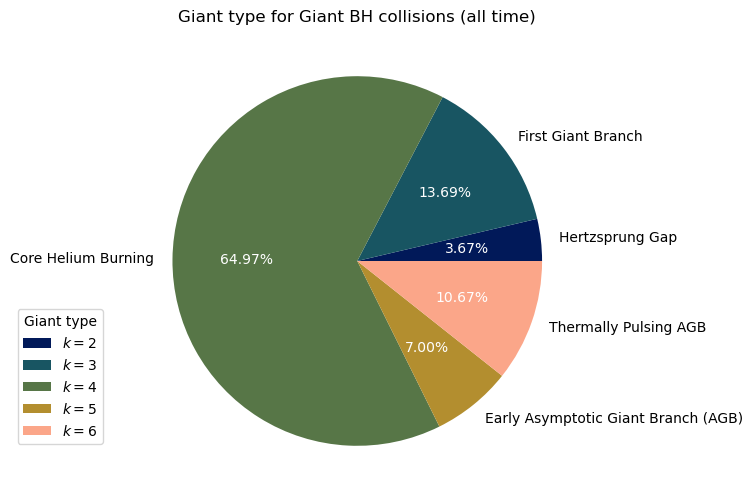

In [147]:
colors = cm.batlow(np.linspace(0, 1, 1+len(set(unique_numbers))))

fig, ax = plt.subplots(figsize=(10, 6))

scatter = ax.pie(fractions, labels=giant_name_types, autopct='%1.2f%%', colors=colors)

for autotext in scatter[2]:
    autotext.set_color('white')
    
ax.set_title(r'Giant type for Giant BH collisions (all time)')
ax.legend(scatter[0], giant_types, title='Giant type', loc='center left', bbox_to_anchor=(-0.25, -0.25, 0.5, 1))

In [145]:
print(giant_name_types_old)
print(fractions_old)

['Hertzsprung Gap', 'First Giant Branch', 'Core Helium Burning', 'Early Asymptotic Giant Branch (AGB)']
[22.705314009661837, 62.80193236714976, 12.560386473429952, 1.932367149758454]


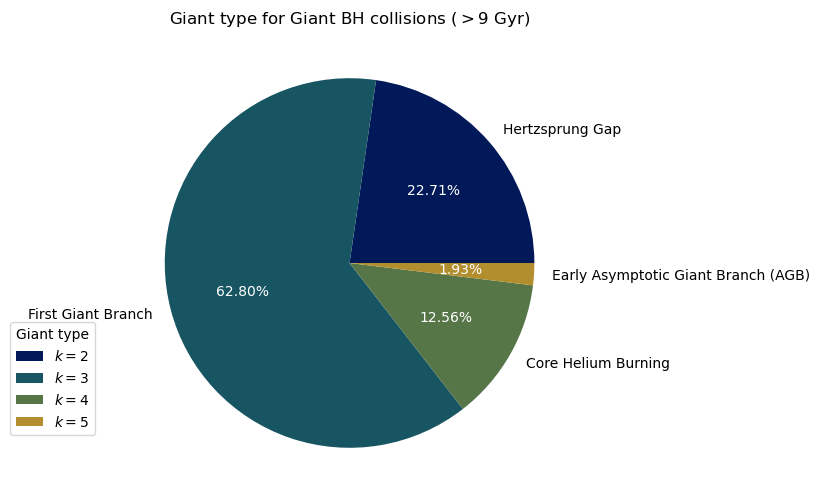

In [148]:

fig, ax = plt.subplots(figsize=(10, 6))

scatter = ax.pie(fractions_old, labels=giant_name_types_old, autopct='%1.2f%%', colors=colors)

for autotext in scatter[2]:
    autotext.set_color('white')


ax.set_title(r'Giant type for Giant BH collisions ($> 9$ Gyr)')
ax.legend(scatter[0], giant_types_old, title='Giant type', loc='center left', bbox_to_anchor=(-0.25, -0.25, 0.5, 1))